# CUSTOMER CHURN MODEL

The Dataset Is Of A Bank Which Had Kept Record Of Its Customers Over Past 1 Year & Within That Phase Who Have Exited(1) Or Non-Exited(0) The Organisation.

The Model Aims At Informing The Bank Beforehand Regarding A Customer Who May Be At The Verge Of Exiting The Bank Based On The Earlier Data of Exiting/Non-Exiting Customers Fed To The Model.

The Main Goal Of This Model Is To Successfuly Make Better Predictions In Classfying A New Customer As On Verge Of Exiting/Non-Exiting customer.

The Beforehand Information Will Be Quite Helpful For Bank In Retaining Its Customers And Avoiding Any Losses.

# Regular Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Data Analysis Of The Dataset

In [ ]:
data= pd.read_csv('Bank_dataset.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Description Of Columns Of Dataset

RowNumber - row index

CustomerID- Unique identification id for customer

Surname- lastname of customer

Geography-country the customer lives in

Gender/Age- self explanatory

Tenure- no. of years the customer has been in bank

Balance- Amount of money present in account

NumOfProducts- different products in quantity used by customer

HasCrCard- whether has a credit card

IsActiveMember- current status of customer,whether using service or not

EstimatedSlary- self explanatory

Exited- whether the customer stayed or left the bank

In [ ]:
#Adding New Column To Dataset For Credit Card Availability Of Customer

data['cred_card_availability']=data['HasCrCard'].map({0:'NO',1:'YES'})
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,cred_card_availability
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,YES
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NO
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,YES
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NO
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,YES


Examining The Geography diversity among customers

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


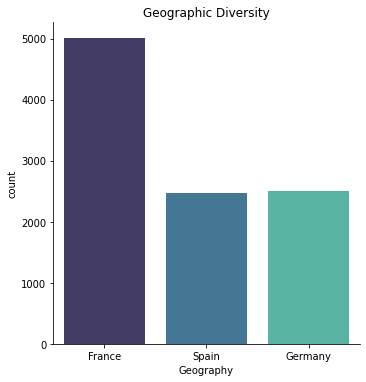

In [ ]:
country_data=data.Geography.value_counts()
print(country_data)

#Visualization
sns.catplot(x='Geography',data=data,kind='count',palette='mako')
plt.title('Geographic Diversity')
plt.show()

Examining The Gender Diversity among the Customers

Male      5457
Female    4543
Name: Gender, dtype: int64


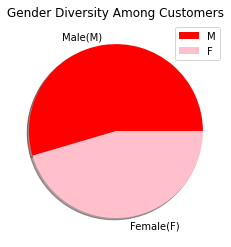

In [ ]:
gender_data= data.Gender.value_counts()
print(gender_data)

#Visualization
plt.pie(gender_data,labels=['Male(M)','Female(F)'],colors=['red','pink'],shadow=True)
plt.title('Gender Diversity Among Customers')
plt.legend('MF')
plt.show()

Examining The Gender Diversity among the Customers wrt Geography

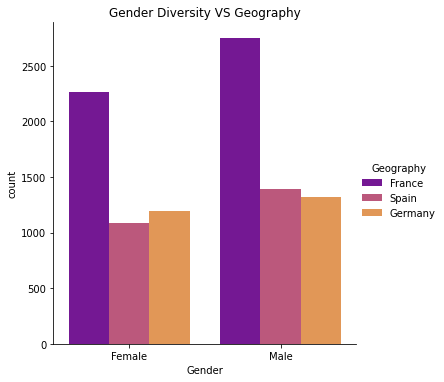

In [ ]:
sns.catplot(x='Gender',data=data,hue='Geography',kind='count',palette='plasma')
plt.title('Gender Diversity VS Geography')
plt.show()

Examining The No. Of Products used by Customers wrt the Gender Diversity

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


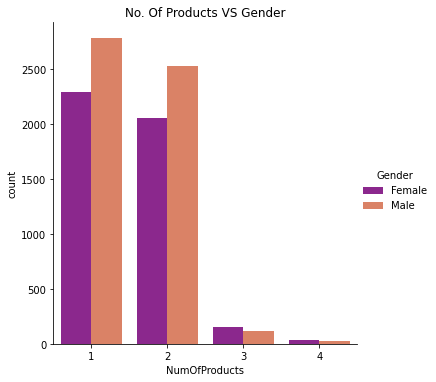

In [ ]:
n_of_products=data.NumOfProducts.value_counts()
print(n_of_products)

#Visualization of no of products wrt Gender Diversity using each of them
sns.catplot(x='NumOfProducts',data=data,hue='Gender',kind='count',palette='plasma')
plt.title('No. Of Products VS Gender')
plt.show()

Examining The Gender Diversity wrt Credit Card availability status among customers

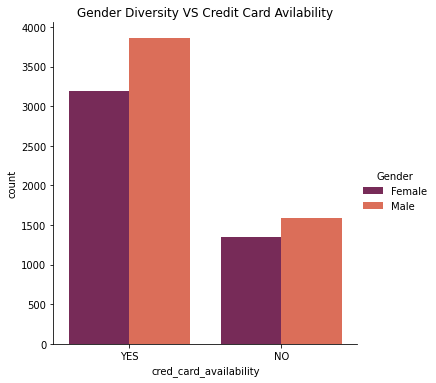

In [ ]:
sns.catplot(x='cred_card_availability',data=data,kind='count',hue='Gender',palette='rocket')
plt.title('Gender Diversity VS Credit Card Avilability')
plt.show()

Examining The Age Diversity Of Customers

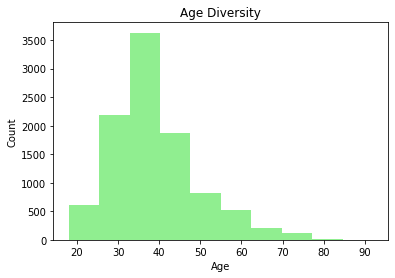

In [ ]:
plt.hist(x=data.Age.dropna(),color='lightgreen')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Diversity')
plt.show()

INFERENCE DRAWN -

1-Population of French customers are the most being served by bank.

2-Majority of the bank customers are Male. 

3-Majority of Male and Female customers belong to France. 

4-With respect to no. of products availed by cutomer for category 1 & 2, Male   customers are the major occupant where as for the rest the female customers are dominant. 

5-With respect to credit card holder status male customers outweighs the female cusromers both in terms of availing as well as non availing the service.

6-The major Age group of customer lie around 30-40.

# Building A Model To Classify Whether Customer Will Exit Or Continue With The Bank Based On Their Past Record

Importing The Regular Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

# Data Preprocessing

In [ ]:
data= pd.read_csv('Bank_dataset.csv')

#Creating the matrix of features X [columns from CreditScore till EstimatedSalary considered]
X=data.iloc[:, 3:-1].values

#Creating the matrix of dependant variable
y=data.iloc[:,-1].values

Encoding The Categorical Data [Geography & Gender]

In [ ]:
#Label Encoding The 'Gender' i.e X[:,2] Column

from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
X[:,2]=label_enc.fit_transform(X[:,2])      

In [ ]:
#One Hot Encoding The 'Geography' Column With Column idx=1 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
col_t=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X=np.array(col_t.fit_transform(X))

In [ ]:
#Splitting The Dataset Into Train Set And Test Set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#Feature Scaling Applied To Entire Dataset

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Making The ANN model

Initializing The ANN

In [ ]:
ann=tf.keras.models.Sequential()

Adding The Input Layer And The First Hidden Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6 ,activation='relu'))

Adding The Second Hidden Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6 ,activation='relu'))

Adding The Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Training The ANN model

Compiling The ANN

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Training The ANN On Train Set

In [ ]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5950 - accuracy: 0.6999
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7980
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4540 - accuracy: 0.7990
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8027
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8031
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8065
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8098
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8124
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8167
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3931 - accura

# Using Trained Model To Make Predictions

Predicting The Test Set Results

In [ ]:
y_pred=ann.predict(X_test)

for i in range (0,y_pred.shape[0]):
    if y_pred[i]>0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

Concatenating Prediction With Original Test Set Data

In [ ]:
concat_result=np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1)
print(concat_result)

[[0. 0.]
 [0. 1.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Making The Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
acc_score = accuracy_score(y_test,y_pred)
print('The Accuracy Score is ' + str(acc_score))

[[1503   92]
 [ 192  213]]
The Accuracy Score is 0.858


# CONCLUSION

The Overal Accuracy Came Out To Be ~ 85%-86%